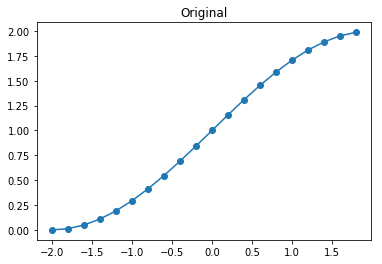

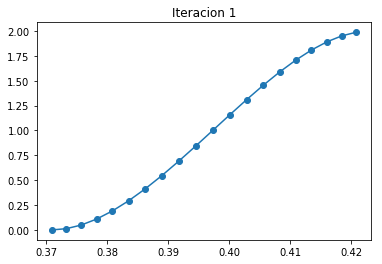

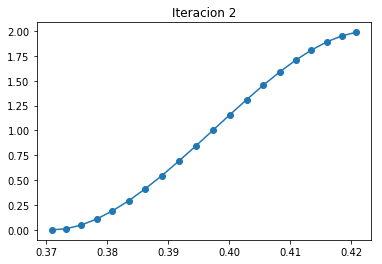

In [105]:
import numpy as np
import math
from matplotlib import pyplot
from random import randrange
#Este programa es la implementación de una red neuronal multicapa
#Ejercicio 1
main()

In [9]:
def logSigmoid(a):
    b = 1/(1+math.exp(-a))
    return b

In [10]:
def purelin(a):
    if a < 0:
        b = 0
    else:
        b = a
    return b

In [11]:
def g(x):
    return 1+math.sin((math.pi/4)*x)

In [12]:
#Primera derivada
def f1(a):
    return (1-a)*(a)

In [13]:
#Segunda derivada
def f2(x):
    return 1

In [69]:
#Condiciones iniciales
def statementInit():
    p = randrange(-2,2, 1)
    w1_0 = np.matrix([[-0.27],[-0.41]])
    b1_0 = np.matrix([[-0.48],[-0.13]])
    w2_0 = np.matrix([0.09,-0.17])
    b2_0 = 0.48
    alpha = 0.1

In [71]:
#Forward Propagation
def forwardPropagation():
    u = w1_0*p + b1_0
    a1 = np.matrix([[logSigmoid(u[0])],[logSigmoid(u[1])]])
    u = w2_0 * a1 + b2_0
    a2 = purelin(u)

In [72]:
#Calculando error
def error():
    e = g(p) - a2

In [74]:
#Back Propagation
def backPropagation():
    s2 = (-2)*f2(1) * e
    u = np.matrix([[f1(a1.item(0)),0],[0,f1(a1.item(1))]])
    s1 = u * w2_0.T * s2

In [76]:
#Calculando pesos y bias
def newWeight():
    w2_1 = w2_0 - alpha*s2*a1.T
    b2_1 = b2_0 - alpha*s2
    w1_1 = w1_0 - alpha*s1*p
    b1_1 = b1_0 - alpha*s1

In [86]:
def newValues():
    salida = np.zeros((1,20))
    contador = 0
    p = -2
    w1_0 = w1_1
    b1_0 = b1_1
    w2_0 = w2_1
    b2_0 = b2_1
    while(contador < 20):   
        #Forward Propagation
        forwardPropagation()
        p = p + 0.2
        salida.itemset(contador,a2)
        if(contador < 20):
            contador = contador + 1
    p = randrange(-2,2, 1)

In [104]:
#Graficando función
def graphFunc(i):
    x = np.arange(-2, 2.0, 0.2)
    pyplot.plot(salida[0,:], y, '-o')
    pyplot.title('Iteracion '+str(i))
    pyplot.show()

In [99]:
def graphFuncInit():
    x = np.arange(-2, 2.0, 0.2)
    y =[g(i) for i in x ]
    pyplot.plot(x, y,'-o')
    pyplot.title('Original')
    pyplot.show()

In [100]:
def main():
    statementInit()
    forwardPropagation()
    error()
    backPropagation()
    newWeight()
    newValues()
    graphFuncInit()
    graphFunc(1)
    forwardPropagation()
    error()
    backPropagation()
    newWeight()
    newValues()
    graphFunc(2)